In [1]:
import os
import numpy as np
import pandas as pd
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind,ttest_rel
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
sns.set_theme(style="white")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False

def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign

## Plot the difference changed with age for hexagonal modulation without Phi

In [2]:
# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
data = participants_data.query('game2_fmri>=0.5')  # look out
subjects = data['Participant_ID'].to_list()

# set cmp template
cmap_temp1 = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexagon_spct/Setall/6fold/{}/zmap/hexagon_zmap.nii.gz'
cmap_temp2 = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/hexagon_spct/Setall/6fold/{}/zmap/hexagon_zmap.nii.gz'
cmap_temp3 = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/distance_spct/Setall/6fold/{}/zmap/M2_corrxdistance_zmap.nii.gz'
# cmap_temp4 = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/distance_spct/Setall/6fold/{}/zmap/M2_corrxdistance_zmap.nii.gz'


sub_cmap1 = [cmap_temp1.format(sub) for sub in subjects]
sub_cmap2 = [cmap_temp2.format(sub) for sub in subjects]
sub_cmap3 = [cmap_temp3.format(sub) for sub in subjects]

# sub_cmap4 = [cmap_temp4.format(sub) for sub in subjects]

# set roi
vmpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_merge_MNI152NL.nii.gz')
#roi = image.load_img(r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexagon_spct/lRSC_thr3.1_erosion.nii.gz')
roi = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl.nii.gz')
roi = image.binarize_img(roi,0)
# roi_data = roi.get_fdata()
# roi_data[roi_data==6]=0
# roi = image.new_img_like(roi,roi_data)
# roi = image.binarize_img(roi,0)
# roi1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.isthmuscingulate.nii.gz')
# roi2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.isthmuscingulate.nii.gz')
# roi = image.math_img('np.logical_or(img1,img2)', img1=roi1, img2=roi2)

ec = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)
hc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/thresh_hippocampus_tail_bothsides_MNINL.nii.gz')
# extract mean activity of ROI for each subjects
sub_mact1 = np.mean(masking.apply_mask(sub_cmap1, roi), axis=1)
sub_mact2 = np.mean(masking.apply_mask(sub_cmap2, roi), axis=1)

# sub_mactHC1 = np.mean(masking.apply_mask(sub_cmap1, hc), axis=1)
# sub_mactHC2 = np.mean(masking.apply_mask(sub_cmap2, hc), axis=1)
#
# sub_mactEC1 = np.mean(masking.apply_mask(sub_cmap1, ec), axis=1)
# sub_mactEC2 = np.mean(masking.apply_mask(sub_cmap2, ec), axis=1)
#sub_mact3 = np.mean(masking.apply_mask(sub_cmap3, vmpfc), axis=1)
# sub_mact4 = np.mean(masking.apply_mask(sub_cmap4, vmpfc), axis=1)
data['game1_act'] = sub_mact1
data['game2_act'] = sub_mact2
data['neural_diff'] = data['game2_act'] - data['game1_act']

# data['game1_act_HC'] = sub_mactHC1
# data['game2_act_HC'] = sub_mactHC2
# data['neural_diff_HC'] = data['game2_act_HC'] - data['game1_act_HC']
#
# data['game1_act_EC'] = sub_mactEC1
# data['game2_act_EC'] = sub_mactEC2
# data['neural_diff_EC'] = data['game2_act_EC'] - data['game1_act_EC']

data['beh_diff'] = data['game2_test_acc'] - data['game1_acc']
#data['distance'] = sub_mact3

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
<ipython-input-2-43fd344877e2>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['game1_act'] = sub_mact1
<ipython-input-2-43fd344877e2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

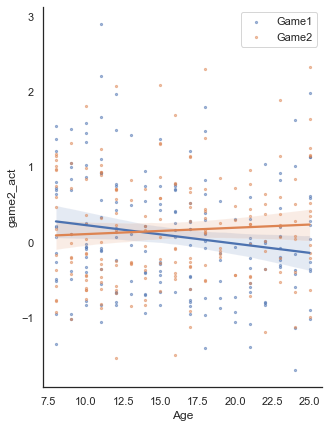

In [267]:
fig,ax = plt.subplots(figsize=(5,7))
sns.regplot(data=data,x='Age',y='game1_act',scatter_kws={'alpha':0.5,'s':5},label='Game1')
sns.regplot(data=data,x='Age',y='game2_act',scatter_kws={'alpha':0.5,'s':5},label='Game2')
ax.legend()

In [259]:
t, p =ttest_rel(data['game2_act'],data['game1_act'],alternative='greater')
print('one-tailed','t = {}, p = {}'.format(round(t,4),round(p,4)))

one-tailed t = 0.9133, p = 0.1811


<ipython-input-5-284349afe899>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neural_diff'] = (data['neural_diff'] - data['neural_diff'].mean()) / data['neural_diff'].std()
<ipython-input-5-284349afe899>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['beh_diff'] = (data['beh_diff'] - data['beh_diff'].mean()) / data['beh_diff'].std()
<ipython-input-5-284349afe899>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Age group: children, t: 0.5487911893484441, p: 0.5849202621959507
Age group: adolescents, t: -0.0794903344599528, p: 0.9369599186155835
Age group: adults, t: -0.6949186618481549, p: 0.48937428672117633


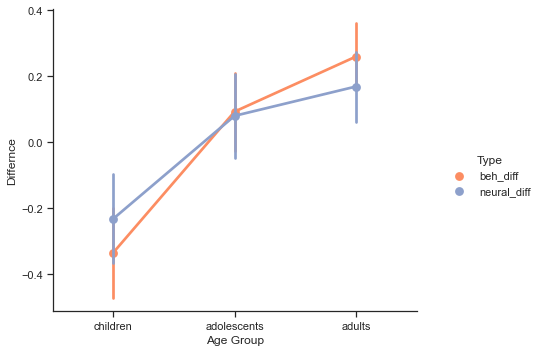

In [5]:
# zscore the neural and behavioral difference
#data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
data['neural_diff'] = (data['neural_diff'] - data['neural_diff'].mean()) / data['neural_diff'].std()
data['beh_diff'] = (data['beh_diff'] - data['beh_diff'].mean()) / data['beh_diff'].std()

# Add age group categories
age_bins = [7, 12, 17, 25]
age_labels = ['children', 'adolescents', 'adults']
data['Age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Melt the data for easier plotting

colorp = sns.color_palette("Set2")[1:3]
data_melted = data.melt(id_vars=['Age_group'], value_vars=['beh_diff','neural_diff'],
                        var_name='Type', value_name='differnce')
g = sns.catplot(x='Age_group', y='differnce', hue='Type', data=data_melted, kind='point', errorbar="se",
                palette=colorp)
x = [0,1,2]
y = [0]*len(x)
g.set_axis_labels("Age Group", "Differnce")
g._legend.set_title('Type')
#g._legend.set_bbox_to_anchor((0.3, 0.8))
g.fig.set_size_inches(8,5)

# compare accuracy between game1 and game2 for each age groups using t-tests
for index,age_group in enumerate(age_labels):
    game1 = data_melted[(data_melted['Age_group'] == age_group) & (data_melted['Type'] == 'neural_diff')]['differnce']
    game2 = data_melted[(data_melted['Age_group'] == age_group) & (data_melted['Type'] == 'beh_diff')]['differnce']
    t, p = ttest_rel(game1, game2)
    print('Age group: {}, t: {}, p: {}'.format(age_group, t, p))
    # add significance stars to the plot for each age group
    if p <= 0.001:
        g.ax.text(index,0.32,'***', ha='center', va='bottom', color='k', fontsize=20)
    elif p <= 0.01:
        g.ax.text(index,0.32,'**', ha='center', va='bottom', color='k', fontsize=20)
    elif p <= 0.05:
        g.ax.text(index,0.32,'*', ha='center', va='bottom', color='k', fontsize=20)
    else:
        g.ax.text(index,0.32,'', ha='center', va='bottom', color='k', fontsize=20)

# Add tick lines to the bottom and left spines
g.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.tick_params(axis='y', which='both', left=True, right=False, direction='out')
savepath = r'/mnt/workdir/DCM/Result/paper/figure5/paird_plot_Game-diff_with_Age.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

In [242]:
# Z-score the neural and behavioral difference
data['neural_diff'] = (data['neural_diff'] - data['neural_diff'].mean()) / data['neural_diff'].std()
data['neural_diff_HC'] = (data['neural_diff_HC'] - data['neural_diff_HC'].mean()) / data['neural_diff_HC'].std()
data['neural_diff_EC'] = (data['neural_diff_EC'] - data['neural_diff_EC'].mean()) / data['neural_diff_EC'].std()
data['beh_diff'] = (data['beh_diff'] - data['beh_diff'].mean()) / data['beh_diff'].std()

# Add age group categories
age_bins = [7, 12, 17, 25]
age_labels = ['children', 'adolescents', 'adults']
data['Age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Define subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 10))

# Create list for plot parameters
plots = ['beh_diff', 'neural_diff', 'neural_diff_HC', 'neural_diff_EC']
# Assign colors based on plot type
plot_colors = sns.color_palette("Set2")[1:2]
plot_colors.extend(["#ff6361","#58508d","#58508d"])

# Loop through each subplot and plot data
for i, ax in enumerate(axs.flatten()):# Same color for all 'neural_diff'
    sns.pointplot(x='Age_group', y=plots[i], data=data, ax=ax, capsize=0, errorbar='se', color=plot_colors[i])
    ax.set_ylabel('Difference')
    ax.set_title(plots[i])
    # Set y limit from -0.5 to 0.5
    ax.set_ylim(-0.5, 0.5)
    # Add tick lines to the bottom and left spines
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
    # Turn off ticks and labels according to position in grid
    if i % 2 == 1:  # right column
        ax.set_yticklabels([])
        ax.set_ylabel('')
    if i < 2:  # top row
        ax.set_xticklabels([])
        ax.set_xlabel('')

plt.tight_layout()
# savepath = r'/mnt/workdir/DCM/Result/paper/figure5/Game-diff_neural_beh_multi-ROIs.pdf'
# plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

<ipython-input-242-31768fc2d494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neural_diff'] = (data['neural_diff'] - data['neural_diff'].mean()) / data['neural_diff'].std()


KeyError: 'neural_diff_HC'

<ipython-input-229-0eeb149a44bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neural_diff'] = (data['neural_diff'] - data['neural_diff'].mean()) / data['neural_diff'].std()
<ipython-input-229-0eeb149a44bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neural_diff_HC'] = (data['neural_diff_HC'] - data['neural_diff_HC'].mean()) / data['neural_diff_HC'].std()
<ipython-input-229-0eeb149a44bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

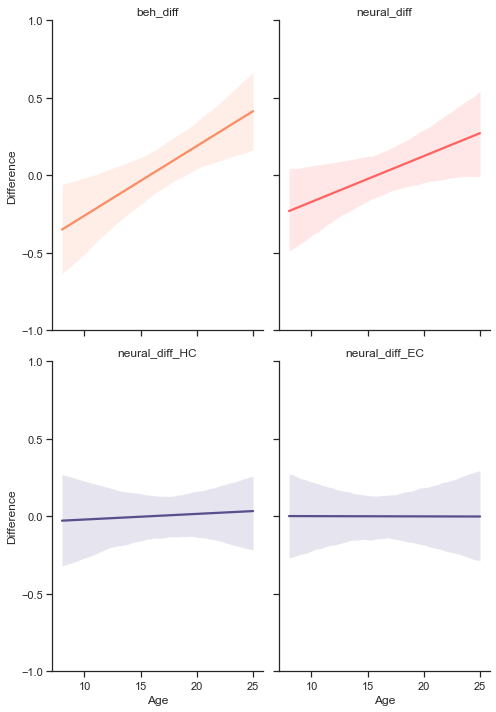

In [229]:
# Z-score the neural and behavioral difference
data['neural_diff'] = (data['neural_diff'] - data['neural_diff'].mean()) / data['neural_diff'].std()
data['neural_diff_HC'] = (data['neural_diff_HC'] - data['neural_diff_HC'].mean()) / data['neural_diff_HC'].std()
data['neural_diff_EC'] = (data['neural_diff_EC'] - data['neural_diff_EC'].mean()) / data['neural_diff_EC'].std()
data['beh_diff'] = (data['beh_diff'] - data['beh_diff'].mean()) / data['beh_diff'].std()

# Add age group categories
age_bins = [7, 12, 17, 25]
age_labels = [10, 15, 21]  # Mid-points of age bins
data['Age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Define subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 10))

# Create list for plot parameters
plots = ['beh_diff', 'neural_diff', 'neural_diff_HC', 'neural_diff_EC']
# Assign colors based on plot type
plot_colors = sns.color_palette("Set2")[1:2]
plot_colors.extend(["#ff6361","#58508d","#58508d"])

# Loop through each subplot and plot data
for i, ax in enumerate(axs.flatten()):# Same color for all 'neural_diff'
    sns.regplot(x='Age', y=plots[i], data=data, ax=ax, color=plot_colors[i],scatter=False,ci=95)
    ax.set_ylabel('Difference')
    ax.set_title(plots[i])
    # Set y limit from -0.5 to 0.5
    ax.set_ylim(-1, 1)
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    # Add tick lines to the bottom and left spines
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
    # Turn off ticks and labels according to position in grid
    if i % 2 == 1:  # right column
        ax.set_yticklabels([])
        ax.set_ylabel('')
    if i < 2:  # top row
        ax.set_xticklabels([])
        ax.set_xlabel('')
plt.tight_layout()
sns.despine(left=False, bottom=False)
# savepath = r'/mnt/workdir/DCM/Result/paper/figure5/Game-diff_neural_beh_regplot_multi-ROIs.pdf'
# plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

## Plot correlation between behavioural difference and neural difference(colour coded the dot based on age).

In [6]:
plt.clf()
# Divide DataFrame into two parts
df1 = data[(data['neural_diff'] > 0) & (data['beh_diff'] > 0)]
df2 = data[(data['neural_diff'] < 0) & (data['beh_diff'] < 0)]

# Sort each part separately
df1 = df1.sort_values(by='Age', ascending=True)  # Older ages last for neural_diff & beh_diff > 0
df2 = df2.sort_values(by='Age', ascending=False)   # Younger ages last for neural_diff & beh_diff < 0

# Concatenate them back together
sorted_df = pd.concat([df1, df2])

# # For rows that don't meet either condition, you can either discard them, or append them to the final sorted dataframe
df3 = data[~data.index.isin(sorted_df.index)]
sorted_df = pd.concat([df1,df2,df3])

<Figure size 432x288 with 0 Axes>

 Correlation between neural difference
 and behavioural difference:r:0.1549,p:0.0315


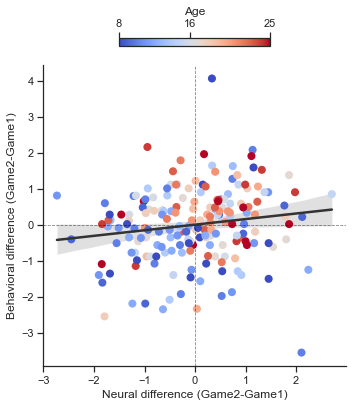

In [8]:
fig, ax = plt.subplots(figsize=(5,6))
ax.axvline(x=0, color='black', linestyle='--',alpha=0.5,linewidth=0.8)
ax.axhline(y=0, color='black', linestyle='--',alpha=0.5,linewidth=0.8)
sns.regplot(x='neural_diff', y='beh_diff', data=data, color='#333333',scatter=False,ci=95,line_kws={'alpha': 1,'linewidth':2.5})

age = sorted_df['Age']
plt.scatter(x='neural_diff', y='beh_diff',data=sorted_df,c=age, cmap='coolwarm',
            s=65,marker='o',edgecolor='None',linewidths=0.3,zorder=1)

plt.colorbar(label='Age',shrink=0.5,ticks=[8,16,25],location='top')
# plt.ylim(-0.3,0.4)
plt.xlabel('Neural difference (Game2-Game1)')
plt.ylabel("Behavioral difference (Game2-Game1)")
# save figure
fig.tight_layout()
# Add tick lines to the bottom and left spines
ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')

r, p = pearsonr(data['neural_diff'],data['beh_diff'])
print(f' Correlation between neural difference\n '
      f'and behavioural difference:r:{round(r,4)},p:{round(p,4)}')
plt.savefig('/mnt/workdir/DCM/Result/paper/figure5/neural_diff_beh_diff.pdf',dpi=300,bbox_inches='tight',transparent=True,pad_inches=0)

## Mediation relationship between age, neural difference and behavioural difference


In [13]:
import pingouin as pg

iv = 'Age'
m = ['neural_diff']
dv = 'beh_diff'

# Standardize the data
data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
data['neural_diff'] = (data['neural_diff'] - data['neural_diff'].mean()) / data['neural_diff'].std()
data['beh_diff'] = (data['beh_diff'] - data['beh_diff'].mean()) / data['beh_diff'].std()

# Mediation analysis
mediation_results,indirect_beta_sample = pg.mediation_analysis(data=data, x=iv, m=m, y=dv, seed=42,n_boot=10000,return_dist=True)
mediation_results.to_csv(r'/mnt/workdir/DCM/Result/paper/figure5/csv',index=False)
np.save(r'/mnt/workdir/DCM/Result/paper/figure3/Indirect_beta_sample_parallel_hexagon_distance.npy',indirect_beta_sample)

<ipython-input-13-eb5be2648779>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
<ipython-input-13-eb5be2648779>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neural_diff'] = (data['neural_diff'] - data['neural_diff'].mean()) / data['neural_diff'].std()
<ipython-input-13-eb5be2648779>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats  import ttest_1samp
import statsmodels.formula.api as smf

def bootstrap_indirect_effect(data, iv, m, dv, n_bootstraps=5000, ci=0.95):
    indirect_effects = []
    for _ in range(n_bootstraps):
        bootstrap_data = data.sample(frac=1, replace=True)

        path_a = smf.ols(f"{m} ~ {iv}", data=bootstrap_data).fit()
        path_b = smf.ols(f"{dv} ~ {m} + {iv}", data=bootstrap_data).fit()

        indirect_effect = path_a.params[1] * path_b.params[1]
        indirect_effects.append(indirect_effect)

    lower = np.percentile(indirect_effects, (1 - ci) / 2 * 100)
    upper = np.percentile(indirect_effects, (1 + ci) / 2 * 100)

    return lower, upper,indirect_effects


# Replace 'IV', 'M', and 'DV' with the actual variable names in your dataset
iv = 'Age'
m = 'neural_diff'
dv = 'beh_diff'

# Path a: IV -> M
path_a = smf.ols(f"{m} ~ {iv}", data=data).fit()

# Path b: M -> DV, controlling for IV
path_b = smf.ols(f"{dv} ~ {m} + {iv}", data=data).fit()
lower, upper,indirect_effects = bootstrap_indirect_effect(data, iv, m, dv,1000)
print(f"Bootstrapped {int(0.95 * 100)}% confidence interval for the indirect effect: ({lower:.8f}, {upper:.8f})")

Bootstrapped 95% confidence interval for the indirect effect: (-0.00187865, 0.06081130)


In [ ]:
# Calculate lower and upper bounds
ci=0.95
lower = np.percentile(indirect_effects, (1 - ci) / 2 * 100)
upper = np.percentile(indirect_effects, (1 + ci) / 2 * 100)

# Plot histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(indirect_effects, color='gray',bins=50)

# Find the bin with the highest frequency and its corresponding height
max_height = max(n)
max_height_index = np.where(n == max_height)[0][0]
max_height_bin = bins[max_height_index]

# Add vertical line at zero with height equal to the maximum frequency
ax.axvline(x=0, ymin=0, ymax=max_height, color='black', linestyle='--')

# Color the histogram between the lower and upper bounds blue
for i in range(len(patches)):
    if lower <= bins[i] < upper:
        patches[i].set_fc('lightsteelblue')

# Remove top and right spines
fig.suptitle(f"{m}'s Bootstrapped {int(ci * 100)}% confidence interval: ({lower:.7f}, {upper:.7f})",size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [83]:
# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
data = participants_data.query('game2_fmri>=0.5')  # look out
subjects = data['Participant_ID'].to_list()

# set cmp template
cmap_temp1 = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexagon_spct/Setall/6fold/{}/zmap/hexagon_zmap.nii.gz'
cmap_temp2 = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/hexagon_spct/Setall/6fold/{}/zmap/hexagon_zmap.nii.gz'

sub_cmap1 = [cmap_temp1.format(sub) for sub in subjects]
sub_cmap2 = [cmap_temp2.format(sub) for sub in subjects]

# set roi
roi = image.load_img(r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexagon_spct/lRSC_thr3.1_erosion.nii.gz')
# # #lroi = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.caudalanteriorcingulate.nii.gz')
# roi1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.rostralanteriorcingulate.nii.gz')
# roi2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.rostralanteriorcingulate.nii.gz')
#roi = image.math_img('np.logical_or(img1,img2)', img1=roi1, img2=roi2)
# rh.isthmuscingulate.nii.gz'
# extract mean activity of ROI for each subjects
sub_mact1 = np.mean(masking.apply_mask(sub_cmap1, roi), axis=1)
sub_mact2 = np.mean(masking.apply_mask(sub_cmap2, roi), axis=1)

# sub_mact4 = np.mean(masking.apply_mask(sub_cmap4, vmpfc), axis=1)
data['game1_act'] = sub_mact1
data['game2_act'] = sub_mact2

<ipython-input-83-4a45028af3c5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['game1_act'] = sub_mact1
<ipython-input-83-4a45028af3c5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['game2_act'] = sub_mact2


Text(0, 0.5, 'Mean activity of RSC')

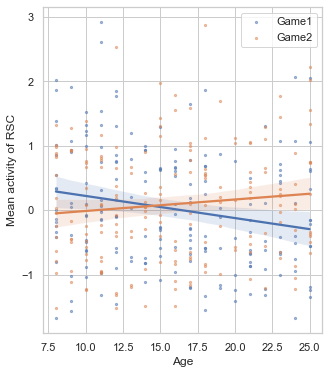

In [85]:
fig,ax = plt.subplots(figsize=(5,6))
sns.regplot(data=data,x='Age',y='game1_act',scatter_kws={'alpha':0.5,'s':5},label='Game1')
sns.regplot(data=data,x='Age',y='game2_act',scatter_kws={'alpha':0.5,'s':5},label='Game2')
ax.legend()
ax.set_ylabel('Mean activity of RSC')
#plt.savefig(r"/mnt/workdir/DCM/Result/paper/figure5/ACC_activity_2Game2withAge.pdf",dpi=300,bbox_inches="tight")

In [84]:
import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

# set
a1 = data['Age']
b1 = data['game1_act']

a2 = data['Age']
b2 = data['game2_act']

# get the correlation coefficients
r1,p1 = pearsonr(a1,b1)
r2,p2 = pearsonr(a2,b2)

# Sample sizes for each correlation coefficient
n1 = len(a1)
n2 = len(a2)
print(r1,p1)
print(r2,p2)

def rz_ci(r, n, conf_level = 0.95):
    zr_se = pow(1/(n - 3), .5)
    moe = norm.ppf(1 - (1 - conf_level)/float(2)) * zr_se
    zu = atanh(r) + moe
    zl = atanh(r) - moe
    return tanh((zl, zu))

def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95, method='fisher'):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """

    if method == 'fisher':
        xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
        ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
        if n2 is None:
            n2 = n

        se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
        diff = xy_z - ab_z
        z = abs(diff / se_diff_r)
        p = (1 - norm.cdf(z))
        if twotailed:
            p *= 2

        return z, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(ab, n2, conf_level=conf_level)[0]
        U2 = rz_ci(ab, n2, conf_level=conf_level)[1]
        lower = xy - ab - pow((pow((xy - L1), 2) + pow((U2 - ab), 2)), 0.5)
        upper = xy - ab + pow((pow((U1 - xy), 2) + pow((ab - L2), 2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')

print(independent_corr(r1 , r2, n1, n2, method='fisher',twotailed=False))

-0.19956503903542017 0.0053945007016126326
0.10889377100550285 0.1316928766325701
(3.037167256283812, 0.0011940645237369374)
